# Statistical Moments - Skewness and Kurtosis

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

Sometimes mean and variance are not enough to describe a distribution. When we calculate variance, we square the deviations around the mean. In the case of large deviations, we do not know whther they are likely to be positive or negative. This is where *skewness* and *symmetry* of a distribution come in. A distribution is **symmetric** if the parts on either side of the mean are mirror images of each other. For example, the normal distribution is symmetric. The normal distribution with mean $\mu$ and standard deviation $\sigma$ is defined as

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)$$

We can plot it to confirm its symmetry:

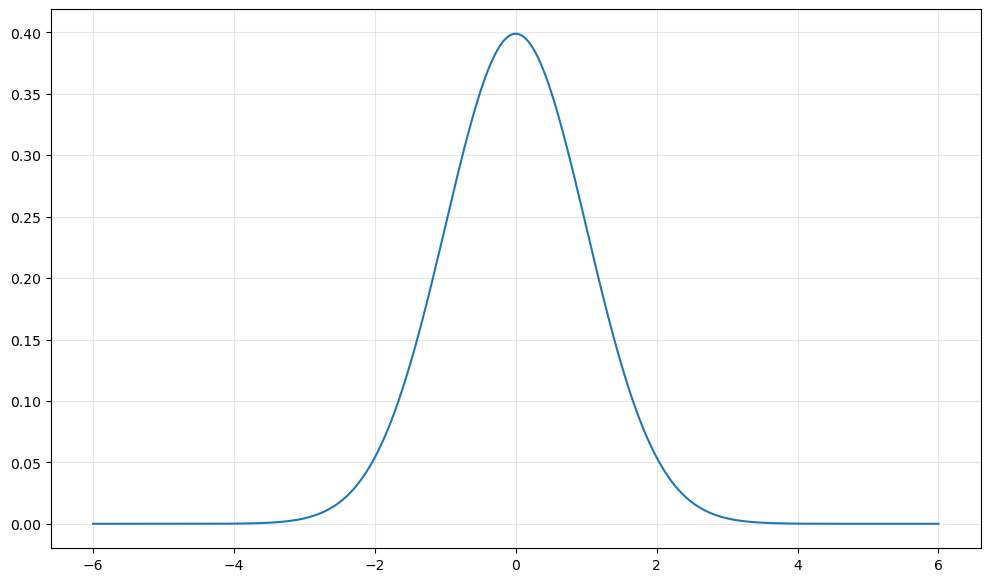

In [6]:
# Plot a normal distribution with mean 0 and standard deivation 2
xs = np.linspace(-6, 6, 300)
normal = stats.norm.pdf(xs)
plt.figure(figsize=(12, 7))
plt.grid(alpha=0.3)
plt.plot(xs, normal)

A distribution that is not symmetric is called **skewed**. For instance, a distribution can have many small positive and a few large negative values (*negatively skewed*) or vice versa (*positive skewed*), and still have a mean of 0. A symmetric distribution has skewness 0. Positively skewed unimodal (one mode) distributions have a property that mean > median > mode. Negatively skewed distributions are the reverse, with mean < median < mode. All three are equal for a symmetric unimodal distribution.

The explicit formula for skewness is:
$$ S_K = \frac{n}{(n-1)(n-2)} \frac{\sum_{i=1}^n (X_i - \mu)^3}{\sigma^3} $$

Where $n$ is the number of observations, $\mu$ is the arithmetic mean, and $\sigma$ is the standard deviation. The sign of this quantity describes the direction of the skew as described above. We can plot a positively skewed and a negatively skewed distribution to see what they look like. For unimodal distributions, a negative skew typically indicates that the tail is fatter on the left, while a positive skew indicates that the tail is fatter on the right.

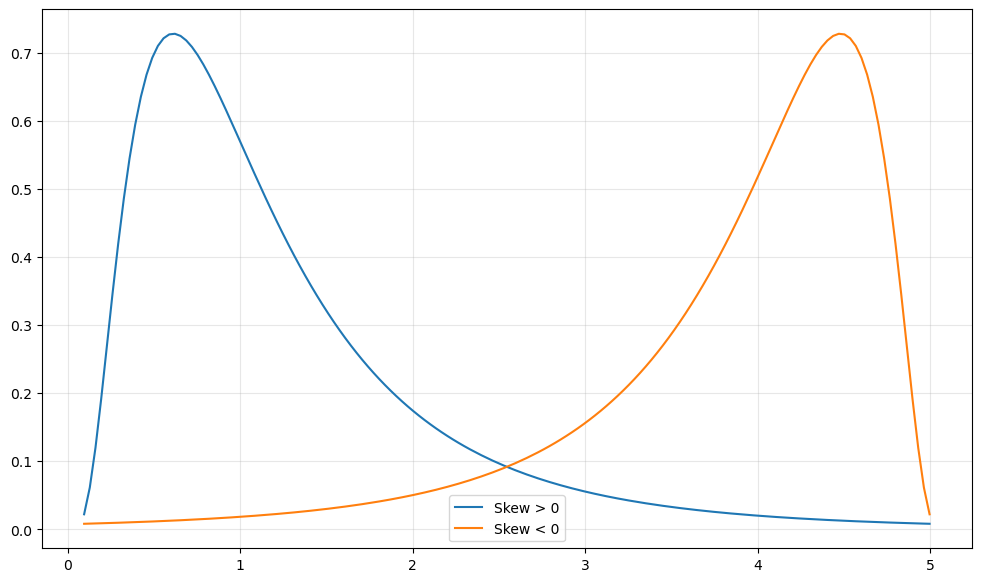

In [15]:
# Generate x-values for which we will plot the distribution
xs2 = np.linspace(stats.lognorm.ppf(0.01, 0.7, loc=-.1), stats.lognorm.ppf(0.99, 0.7, loc=-.1), 150)

# Positively skewed distribution
lognormal = stats.lognorm.pdf(xs2, 0.7)
plt.figure(figsize=(12, 7))
plt.grid(alpha=0.3)
plt.plot(xs2, lognormal, label="Skew > 0")

# Negatively skewed distribution
plt.plot(xs2, lognormal[::-1], label="Skew < 0")
plt.legend()

Althought skew is less obvious when graphing discrete datasets, we can still compute it. For example, below are the skew, mean, and median for S&P 500 returns 2012-2014. Note that the skew is negative, so the mean is less than the median.

In [ ]:
# Mock implementation of get_pricing function
import pandas as pd
import yfinance as yf

_FIELD_MAP = {
    "price": "Close",        # Quantopian "price" ~= daily close
    "open_price": "Open",
    "high": "High",
    "low": "Low",
    "close_price": "Close",
    "volume": "Volume",
    "adj_close": "Adj Close",
}

def get_pricing(symbol, start_date, end_date, fields="price", adjusted=False):
    if isinstance(symbol, str):
        tickers = [symbol]
    else:
        tickers = list(symbol)

    col = _FIELD_MAP.get(fields, fields)

    df = yf.download(
        tickers=tickers,
        start=start_date,
        end=end_date,
        interval="1d",
        auto_adjust=adjusted,
        actions=False,
        progress=False,
        group_by="ticker",
    )

    # Case 1: MultiIndex columns: (ticker, field)
    if isinstance(df.columns, pd.MultiIndex):
        # return Series for single ticker, DataFrame for multi tickers
        if len(tickers) == 1:
            t = tickers[0]
            if (t, col) not in df.columns:
                raise KeyError(f"Missing {(t, col)}. Available: {list(df.columns)}")
            out = df[(t, col)].copy()
            out.name = t
            return out
        else:
            out = {}
            for t in tickers:
                if (t, col) not in df.columns:
                    raise KeyError(f"Missing {(t, col)}. Available: {list(df.columns)[:10]} ...")
                out[t] = df[(t, col)]
            return pd.DataFrame(out)

    # Case 2: Flat columns: "Open", "High", ...
    else:
        if col not in df.columns:
            raise KeyError(f"Field '{fields}' mapped to '{col}' not found. Available: {list(df.columns)}")
        if len(tickers) == 1:
            out = df[col].copy()
            out.name = tickers[0]
            return out
        else:
            # In flat-column case with multiple tickers, yfinance usually returns MultiIndex,
            # but handle defensively anyway.
            return df[col].copy()

/Users/amourtu1934/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Skew: 0.5557997614292686
Mean: 0.0003777295497615644
Median: 0.0


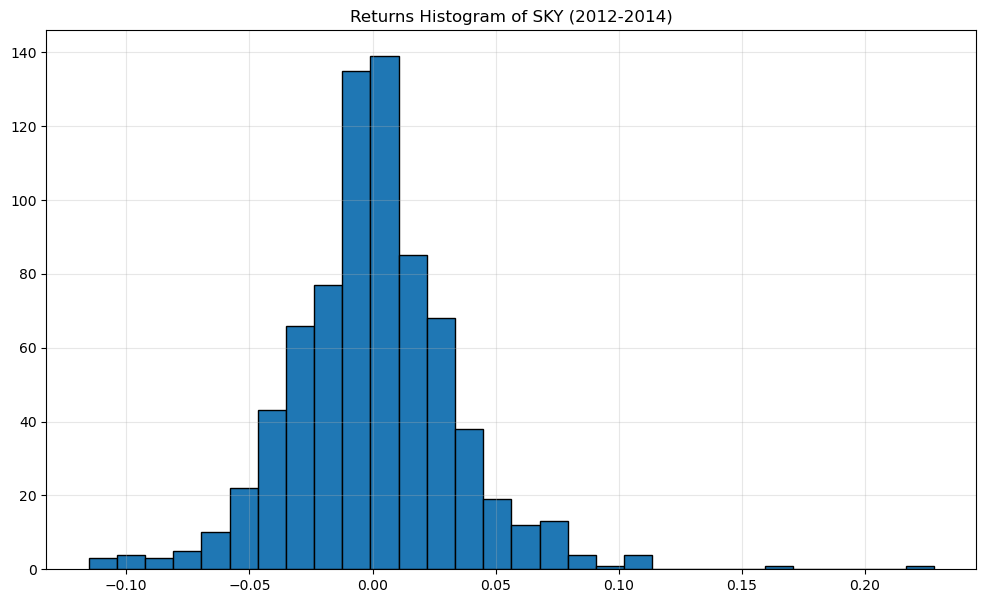

In [28]:
start = "2012-01-01"
end   = "2015-01-01"
pricing = get_pricing("SKY", fields="price", start_date=start, end_date=end)
returns = pricing.pct_change()[1:]

print(f"Skew: {stats.skew(returns)}")
print(f"Mean: {np.mean(returns)}")
print(f"Median: {np.median(returns)}")

plt.figure(figsize=(12, 7))
plt.grid(alpha=0.3)
plt.hist(returns, bins=30, edgecolor="black")
plt.title("Returns Histogram of SKY (2012-2014)");

## Kurtosis

**Kurtosis** attempts to measure the shape of the deviation from the mean. Generally, it describes how peaked a distribution is compared to the normal distribution, called mesokurtic. All normal distributions, regardless of mean and variance, have a kurtosis of 3. A *leptokurtic distribution* (kurtosis > 3) is highly peaked and has fat tails, while a *platykurtic distribution* (kurtosis < 3) is broad. Sometimes, however, kurtosis in excess of normal distribution (kurtosis - 3) is used, and this is the default in `scipy`. A leptokurtic distribution has more frequent large jumps away from the mean than a normal distribution does, while a playtykurtic distribution has fewer.

Excess kurtosis of leptokurtic distribution: 3.0
Excess kurtosis of mesokurtic distribution: 0.0
Excess kurtosis of platykurtic distribution: -0.5937628755982794


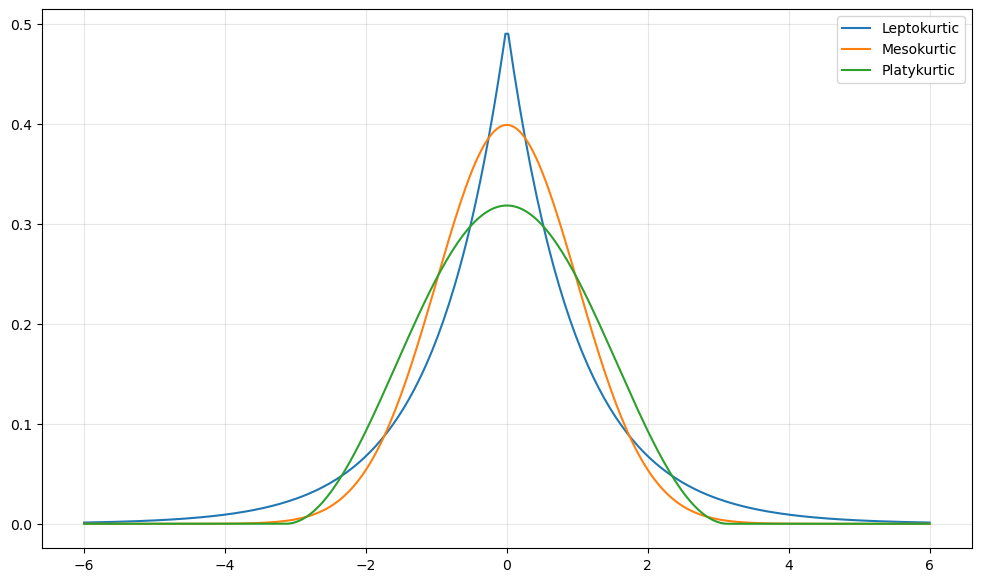

In [31]:
# Plot some example distribution
plt.figure(figsize=(12, 7))
plt.grid(alpha=0.3)

plt.plot(xs, stats.laplace.pdf(xs), label="Leptokurtic")
print(f"Excess kurtosis of leptokurtic distribution: {stats.laplace.stats(moments='k')}")

plt.plot(xs, normal, label="Mesokurtic")
print(f"Excess kurtosis of mesokurtic distribution: {stats.norm.stats(moments='k')}")

plt.plot(xs, stats.cosine.pdf(xs), label="Platykurtic")
print(f"Excess kurtosis of platykurtic distribution: {stats.cosine.stats(moments='k')}")

plt.legend()
plt.show();

The formula for kurtosis is
$$ K = \left ( \frac{n(n+1)}{(n-1)(n-2)(n-3)} \frac{\sum_{i=1}^n (X_i - \mu)^4}{\sigma^4} \right ) $$

while excess kurtosis is given by
$$ K_E = \left ( \frac{n(n+1)}{(n-1)(n-2)(n-3)} \frac{\sum_{i=1}^n (X_i - \mu)^4}{\sigma^4} \right ) - \frac{3(n-1)^2}{(n-2)(n-3)} $$

For a large number of samples, the excess kurtosis becomes approximately

$$ K_E \approx \frac{1}{n} \frac{\sum_{i=1}^n (X_i - \mu)^4}{\sigma^4} - 3 $$

Since above we were considering perfect, continuous distributions, this was the form that kurtosis took. However, for a set of samples drawn for the normal distribution, we would use the first definition, and (excess) kurtosis would only be approximately 0.

We can use `scipy` to find the excess kurtosis of the S&P 500 returns from before.

In [32]:
print(f"Excess kurtosis of returns: {stats.kurtosis(returns)}")

Excess kurtosis of returns: 3.93979284021232


The histogram of the returns show significant observations beyond 3 standard deviations away from the mean, multiple large spikes, so we shouldn't be surprised that the kurtosis is indicating a leptokurtic distribution.

## Other Standardized Moments

It's no coincidence that the variance, skewness, and kurtosis take similar forms. They are the first and most important standardized moments, of which the $k$-th has the form
$$ \frac{E[(X - E[X])^k]}{\sigma^k} $$

The first standardized moment is always 0 $(E[X - E[X]] = E[X] - E[E[X]] = 0)$, so we only care about the second through fourth. All of the standardized moments are dimensionless numbers which describe the distribution, and in particular can be used to quantify how close to normal (having standardized moments ($0, \sigma, 0, \sigma^2$)) a distribution is.

## Normality Testing Using Jarque-Bera

The *Jarque-Bera test* is a common statistical test that compares whether the sample data has skewness and kurtosis similar to a normal distribution. The JB test's null hypothesis is that the data came from a normal distribution. Because of this, it can err on the side of not catching a non-normal process if we have a low p-value. To be safe, it can be good to increase your cut-off when using the test.

Remember to treat p-values as binary and not try to read into them or compare them. We'll use a cut-off of 0.05 for our p-value.

In [42]:
from statsmodels.stats.stattools import jarque_bera

N = 1000
M = 1000

pvalues = np.ndarray((N))

for i in range(N):
    # Draw M samples from a normal distribution 
    X = np.random.normal(0, 1, M);
    _, pvalue, _, _ = jarque_bera(X)
    pvalues[i] = pvalue
    
# Count number of pvalues below our default 0.05 cutoff
num_significant = len(pvalues[pvalues < 0.05])

print(num_significant / N)

0.042


Great, if properly calibrated we should expect to be wrong $5\%$ of the time at a 0.05 significance level, and this is pretty close. This means that the test is working as we expect.

In [44]:
_, pvalue, _, _ = jarque_bera(returns)

if pvalue > 0.05:
    print("The returns are likely normal")
else:
    print("The returns are likely not normal")

The returns are likely not normal


This tells us that the S&P 500 returns likely do not follow a normal distribution.